1) Prepare a classification model using Naive Bayes 

for salary data 

Data Description:

* age -- age of a person
* workclass	-- A work class is a grouping of work 
* education	-- Education of an individuals	
* maritalstatus -- Marital status of an individulas	
* occupation	 -- occupation of an individuals
* relationship -- 	
* race --  Race of an Individual
* sex --  Gender of an Individual
* capitalgain --  profit received from the sale of an investment	
* capitalloss	-- A decrease in the value of a capital asset
* hoursperweek -- number of hours work per week	
* native -- Native of an individual
* Salary -- salary of an individual


In [33]:
# IMPORT LIBRARIES 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Upload training  data

In [4]:
df= pd.read_csv('SalaryData_Train.csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
# DATA SIZE

df.shape

(30161, 14)

<AxesSubplot:>

<Figure size 1296x432 with 0 Axes>

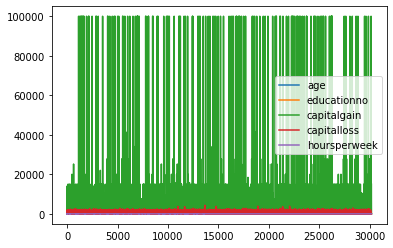

In [7]:
# DATA VISUALIZATION
plt.figure(figsize=(18,6))
df.plot()

<AxesSubplot:>

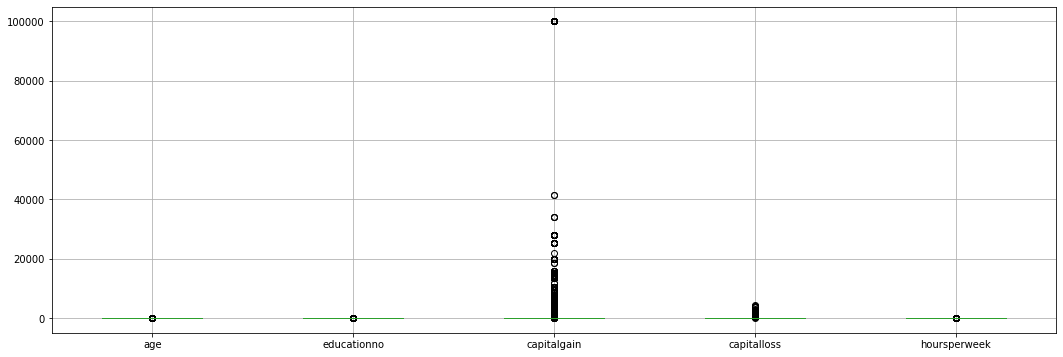

In [9]:
plt.figure(figsize=(18,6))
df.boxplot()

<AxesSubplot:ylabel='Frequency'>

<Figure size 1296x432 with 0 Axes>

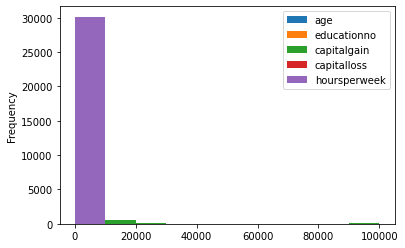

In [11]:
plt.figure(figsize=(18,6))
df.plot(kind='hist')

In [13]:
# CONVERTING STRING TYPE COLUMNS DATA IN DIGIT FORM 

from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()     

cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']
df[cols]=df[cols].apply(label_encoder1.fit_transform)
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [14]:
# SPLITING DATA INTO DEPENDEDNT(TARGET) AND INDEPENDENT VARIABEL
y_train=df['Salary']
x_train=df.drop(['Salary'],axis=1)

# Upload Test data

In [15]:
# UPLOAD TEST DATA 

df1=pd.read_csv('SalaryData_Test.csv')
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [16]:
# CONVERTING STRING TYPE COLUMNS DATA IN DIGIT FORM 

from sklearn.preprocessing import LabelEncoder

label_encoder2 = LabelEncoder()     

cols2=['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']
df1[cols]=df1[cols2].apply(label_encoder2.fit_transform)
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [17]:
# SPLITING DATA INTO DEPENDEDNT(TARGET) AND INDEPENDENT VARIABEL
y_test1=df1['Salary']
x_test1=df1.drop(['Salary'],axis=1)

# Create model
# Multinomial Naive Bayes


In [18]:
from sklearn.naive_bayes import MultinomialNB as MB
classifier_mb = MB()

In [21]:
model=classifier_mb.fit(x_train, y_train)
model

MultinomialNB()

In [23]:
# Model Test

# Model Accuracy on train set

train_pred_m = model.predict(x_train)
accuracy_train_m = np.mean(train_pred_m ==y_train ) 

accuracy_train_m

0.7729186698053778

In [25]:
# Model Accuracy on test set

test_pred_m1 = classifier_mb.predict(x_test1)
accuracy_test_m1 = np.mean(test_pred_m1 == y_test1) 
accuracy_test_m1

0.7749667994687915

# Create Model
# Gaussian Naive Bayes


In [26]:
from sklearn.naive_bayes import GaussianNB as GB

model1=classifier_gb = GB()
model1

GaussianNB()

In [27]:
model1.fit(x_train, y_train)


GaussianNB()

In [28]:
# Model Test accuracy on trainnig data
 
train_pred_g = model1.predict(x_train)

accuracy_train_g = np.mean(train_pred_g==y_train)
accuracy_train_g

0.7953317197705646

In [30]:
# Model accuracy on test data

test_pred_g1 = model1.predict(x_test1)
accuracy_test_g1 = np.mean(test_pred_g1==y_test1) 
accuracy_test_g1

0.7946879150066402

* By above models we can understand for this data  'Gaussian Naive Bayes' is better than Multinomial Naive Bayes


# Confusion matrix

In [31]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test1, test_pred_g1)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10759   601]
 [ 2491  1209]]

True Positives(TP) =  10759

True Negatives(TN) =  1209

False Positives(FP) =  601

False Negatives(FN) =  2491


<AxesSubplot:>

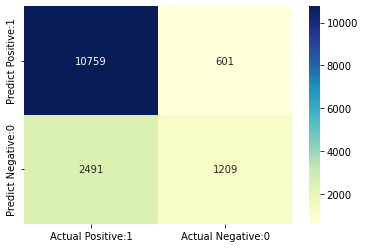

In [34]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')